In [2]:
cd /kaggle/input/new-final-hack-data-set

/kaggle/input/new-final-hack-data-set


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
Train_claim = pd.read_csv("Train_Claim.csv",na_values = ["?","MISSINGVLAUES","MISSEDDATA","-5"])
Train_demo = pd.read_csv("Train_Demographics.csv")
Train_policy = pd.read_csv("Train_Policy.csv",na_values = ["-1"])
Train_vehicle = pd.read_csv("Train_Vehicle.csv",na_values = ["???"])
Traindata_with_Target = pd.read_excel("Traindata_with_Target.xlsx")

In [5]:
Train_claim

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17.0,3,NaN,1,0,NaN,65501.0,13417,6071,46013
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10.0,3,YES,2,1,YES,61382.0,15560,5919,39903
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22.0,1,YES,2,3,NO,66755.0,11630,11630,43495
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22.0,1,YES,2,3,NO,66243.0,12003,12003,42237
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10.0,1,NO,2,1,YES,53544.0,8829,7234,37481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,Cust9993,2015-01-24,Vehicle Theft,NaN,Trivial Damage,Police,State9,City4,Location 1890,3.0,1,NO,0,3,NaN,6590.0,870,1078,4642
28832,Cust9994,2015-02-09,Single Vehicle Collision,Front Collision,Minor Damage,Fire,State8,City3,Location 2097,17.0,1,YES,0,2,YES,74547.0,14699,7875,51973
28833,Cust9996,2015-01-28,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State9,City7,Location 1452,1.0,1,YES,2,0,YES,55305.0,7043,7043,41219
28834,Cust9997,2015-01-28,Single Vehicle Collision,Rear Collision,Minor Damage,Ambulance,State9,City3,Location 1876,1.0,1,NaN,2,0,YES,55830.0,7059,7059,41712


In [6]:
Train_demo

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country
0,Cust10000,35,454776,MALE,JD,armed-forces,movies,56700,-48500,India
1,Cust10001,36,454776,MALE,JD,tech-support,cross-fit,70600,-48500,India
2,Cust10002,33,603260,MALE,JD,armed-forces,polo,66400,-63700,India
3,Cust10003,36,474848,MALE,JD,armed-forces,polo,47900,-73400,India
4,Cust10004,29,457942,FEMALE,High School,exec-managerial,dancing,0,-41500,India
...,...,...,...,...,...,...,...,...,...,...
28831,Cust9993,46,600561,MALE,Masters,protective-serv,sleeping,0,0,India
28832,Cust9994,44,439304,MALE,Masters,adm-clerical,dancing,0,-28800,India
28833,Cust9996,53,460722,MALE,PhD,transport-moving,base-jumping,63100,-43800,India
28834,Cust9997,53,472634,MALE,Associate,transport-moving,skydiving,67400,-43800,India


In [7]:
Train_policy

,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,CustomerID
0,110122,328,2014-10-17,State3,250/500,1000,1406.91,0,husband,Cust1001
1,110125,256,1990-05-25,State1,250/500,2000,1415.74,6000000,unmarried,Cust1004
2,110126,228,2014-06-06,State1,500/1000,1000,1583.91,6000000,unmarried,Cust1005
3,110127,256,2006-10-12,State3,250/500,1000,1351.10,0,unmarried,Cust1006
4,110128,137,2000-06-04,State2,250/500,1000,1333.35,0,husband,Cust1007
...,...,...,...,...,...,...,...,...,...,...
28831,148614,425,1999-10-12,State3,250/500,1000,839.81,0,wife,Cust39493
28832,148615,367,1996-11-09,State3,250/500,1000,811.03,0,husband,Cust39494
28833,148616,208,1995-12-04,State3,250/500,1000,891.37,0,husband,Cust39495
28834,148618,401,1994-09-12,State3,250/500,856,911.37,0,own-child,Cust39497


In [8]:
Train_vehicle

,CustomerID,VehicleAttribute,VehicleAttributeDetails
0,Cust20179,VehicleID,Vehicle8898
1,Cust21384,VehicleModel,Malibu
2,Cust33335,VehicleMake,Toyota
3,Cust27118,VehicleModel,Neon
4,Cust13038,VehicleID,Vehicle30212
...,...,...,...
115339,Cust22134,VehicleMake,Audi
115340,Cust25338,VehicleID,Vehicle28831
115341,Cust7637,VehicleID,Vehicle12870
115342,Cust33581,VehicleID,Vehicle19680


In [9]:
Traindata_with_Target

,CustomerID,ReportedFraud
0,Cust20065,N
1,Cust37589,N
2,Cust24312,N
3,Cust5493,Y
4,Cust7704,Y
...,...,...
28831,Cust9773,N
28832,Cust38439,N
28833,Cust38444,N
28834,Cust26466,N


In [10]:
print("Train_claim            =   ", Train_claim.shape)
print("Train_demo             =   ", Train_demo.shape)
print("Train_policy           =   ", Train_policy.shape)
print("Train_vehicle          =   ", Train_vehicle.shape)
print("Traindata_with_Target  =   ", Traindata_with_Target.shape)

Train_claim            =    (28836, 19)
Train_demo             =    (28836, 10)
Train_policy           =    (28836, 10)
Train_vehicle          =    (115344, 3)
Traindata_with_Target  =    (28836, 2)


In [11]:
Train_veh = pd.crosstab(Train_vehicle["CustomerID"], Train_vehicle["VehicleAttribute"], Train_vehicle["VehicleAttributeDetails"],aggfunc="first")

In [12]:
Train_veh

VehicleAttribute,VehicleID,VehicleMake,VehicleModel,VehicleYOM
CustomerID,,,,
Cust10000,Vehicle26917,Audi,A5,2008
Cust10001,Vehicle15893,Audi,A5,2006
Cust10002,Vehicle5152,Volkswagen,Jetta,1999
Cust10003,Vehicle37363,Volkswagen,Jetta,2003
Cust10004,Vehicle28633,Toyota,CRV,2010
...,...,...,...,...
Cust9993,Vehicle13568,Suburu,Impreza,2007
Cust9994,Vehicle19810,Jeep,Wrangler,2003
Cust9996,Vehicle3339,Suburu,Legacy,2004


In [13]:
Train_veh.keys()

Index(['VehicleID', 'VehicleMake', 'VehicleModel', 'VehicleYOM'], dtype='object', name='VehicleAttribute')

In [14]:
print("Train_claim            --->   ", Train_claim.shape)
print("Train_demo             --->   ", Train_demo.shape)
print("Train_policy           --->   ", Train_policy.shape)
print("Train_veh              --->   ", Train_veh.shape)
print("Traindata_with_Target  --->   ", Traindata_with_Target.shape)

Train_claim            --->    (28836, 19)
Train_demo             --->    (28836, 10)
Train_policy           --->    (28836, 10)
Train_veh              --->    (28836, 4)
Traindata_with_Target  --->    (28836, 2)


In [15]:
print("*******Train_claim_Null_values*******\n",Train_claim.isnull().sum()*100/len(Train_claim))
print("----------------------------------------")
print("*******Train_demo_Null_values*******\n",Train_demo.isnull().sum()*100/len(Train_claim))
print("----------------------------------------")
print("*******Train_policy_Null_values*******\n",Train_policy.isnull().sum()*100/len(Train_claim))
print("----------------------------------------")
print("*******Train_veh_Null_values*******\n",Train_veh.isnull().sum()*100/len(Train_claim))
print("----------------------------------------")
print("*******Traindata_with_Target_Null_values*******\n",Traindata_with_Target.isnull().sum()*100/len(Train_claim))
print("----------------------------------------")

*******Train_claim_Null_values*******
 CustomerID                0.000000
DateOfIncident            0.000000
TypeOfIncident            0.000000
TypeOfCollission         17.901235
SeverityOfIncident        0.000000
AuthoritiesContacted      0.000000
IncidentState             0.000000
IncidentCity              0.000000
IncidentAddress           0.000000
IncidentTime              0.107505
NumberOfVehicles          0.000000
PropertyDamage           36.270634
BodilyInjuries            0.000000
Witnesses                 0.000000
PoliceReport             34.002636
AmountOfTotalClaim        0.173394
AmountOfInjuryClaim       0.000000
AmountOfPropertyClaim     0.000000
AmountOfVehicleDamage     0.000000
dtype: float64
----------------------------------------
*******Train_demo_Null_values*******
 CustomerID               0.000000
InsuredAge               0.000000
InsuredZipCode           0.000000
InsuredGender            0.104037
InsuredEducationLevel    0.000000
InsuredOccupation        0.00000

In [16]:
df1 = pd.merge(Train_claim,Train_demo,on="CustomerID")
df2 = pd.merge(df1,Train_policy,on="CustomerID")
df3 = pd.merge(df2,Traindata_with_Target,on="CustomerID")
merged_train = pd.merge(df3,Train_veh,on="CustomerID")

In [17]:
merged_train

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,...,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,ReportedFraud,VehicleID,VehicleMake,VehicleModel,VehicleYOM
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17.0,...,100/300,1000,1632.73,0,not-in-family,N,Vehicle26917,Audi,A5,2008
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10.0,...,100/300,1000,1255.19,0,not-in-family,N,Vehicle15893,Audi,A5,2006
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22.0,...,500/1000,617,1373.38,0,wife,N,Vehicle5152,Volkswagen,Jetta,1999
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22.0,...,500/1000,722,1337.60,0,own-child,N,Vehicle37363,Volkswagen,Jetta,2003
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10.0,...,100/300,500,1353.73,4279863,unmarried,N,Vehicle28633,Toyota,CRV,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,Cust9993,2015-01-24,Vehicle Theft,NaN,Trivial Damage,Police,State9,City4,Location 1890,3.0,...,500/1000,655,1276.01,0,unmarried,N,Vehicle13568,Suburu,Impreza,2007
28832,Cust9994,2015-02-09,Single Vehicle Collision,Front Collision,Minor Damage,Fire,State8,City3,Location 2097,17.0,...,100/300,1089,1273.38,0,unmarried,N,Vehicle19810,Jeep,Wrangler,2003
28833,Cust9996,2015-01-28,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State9,City7,Location 1452,1.0,...,250/500,787,1380.92,3448735,own-child,N,Vehicle3339,Suburu,Legacy,2004
28834,Cust9997,2015-01-28,Single Vehicle Collision,Rear Collision,Minor Damage,Ambulance,State9,City3,Location 1876,1.0,...,250/500,780,1389.29,3364301,not-in-family,N,Vehicle10240,Suburu,Forrestor,2004


In [18]:
merged_train['ReportedFraud']

0        N
1        N
2        N
3        N
4        N
        ..
28831    N
28832    N
28833    N
28834    N
28835    N
Name: ReportedFraud, Length: 28836, dtype: object

### conerting the Y as 1 and N as 0 in the tagert column(ReportedFraud)

In [19]:
merged_train['ReportedFraud'] = merged_train['ReportedFraud'].apply(lambda x: 1 if x=='Y' else 0)

In [20]:
merged_train['ReportedFraud']

0        0
1        0
2        0
3        0
4        0
        ..
28831    0
28832    0
28833    0
28834    0
28835    0
Name: ReportedFraud, Length: 28836, dtype: int64

In [21]:
merged_train.shape

(28836, 42)

In [22]:
merged_train.dtypes

CustomerID                     object
DateOfIncident                 object
TypeOfIncident                 object
TypeOfCollission               object
SeverityOfIncident             object
AuthoritiesContacted           object
IncidentState                  object
IncidentCity                   object
IncidentAddress                object
IncidentTime                  float64
NumberOfVehicles                int64
PropertyDamage                 object
BodilyInjuries                  int64
Witnesses                      object
PoliceReport                   object
AmountOfTotalClaim            float64
AmountOfInjuryClaim             int64
AmountOfPropertyClaim           int64
AmountOfVehicleDamage           int64
InsuredAge                      int64
InsuredZipCode                  int64
InsuredGender                  object
InsuredEducationLevel          object
InsuredOccupation              object
InsuredHobbies                 object
CapitalGains                    int64
CapitalLoss 

In [23]:
merged_train.shape

(28836, 42)

In [24]:
merged_train.columns

Index(['CustomerID', 'DateOfIncident', 'TypeOfIncident', 'TypeOfCollission',
       'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState',
       'IncidentCity', 'IncidentAddress', 'IncidentTime', 'NumberOfVehicles',
       'PropertyDamage', 'BodilyInjuries', 'Witnesses', 'PoliceReport',
       'AmountOfTotalClaim', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim',
       'AmountOfVehicleDamage', 'InsuredAge', 'InsuredZipCode',
       'InsuredGender', 'InsuredEducationLevel', 'InsuredOccupation',
       'InsuredHobbies', 'CapitalGains', 'CapitalLoss', 'Country',
       'InsurancePolicyNumber', 'CustomerLoyaltyPeriod',
       'DateOfPolicyCoverage', 'InsurancePolicyState',
       'Policy_CombinedSingleLimit', 'Policy_Deductible',
       'PolicyAnnualPremium', 'UmbrellaLimit', 'InsuredRelationship',
       'ReportedFraud', 'VehicleID', 'VehicleMake', 'VehicleModel',
       'VehicleYOM'],
      dtype='object')

In [25]:
merged_train.dtypes

CustomerID                     object
DateOfIncident                 object
TypeOfIncident                 object
TypeOfCollission               object
SeverityOfIncident             object
AuthoritiesContacted           object
IncidentState                  object
IncidentCity                   object
IncidentAddress                object
IncidentTime                  float64
NumberOfVehicles                int64
PropertyDamage                 object
BodilyInjuries                  int64
Witnesses                      object
PoliceReport                   object
AmountOfTotalClaim            float64
AmountOfInjuryClaim             int64
AmountOfPropertyClaim           int64
AmountOfVehicleDamage           int64
InsuredAge                      int64
InsuredZipCode                  int64
InsuredGender                  object
InsuredEducationLevel          object
InsuredOccupation              object
InsuredHobbies                 object
CapitalGains                    int64
CapitalLoss 

In [26]:
merged_train['DateOfIncident'] = pd.to_datetime(merged_train['DateOfIncident'])
merged_train["DateOfIncident"].dtypes

dtype('<M8[ns]')

In [27]:
merged_train['DateOfPolicyCoverage'] = pd.to_datetime(merged_train['DateOfPolicyCoverage'])
merged_train["DateOfPolicyCoverage"].dtypes

dtype('<M8[ns]')

In [28]:
# create new columns for day, month, and year
merged_train['DayOfIncident'] = merged_train['DateOfIncident'].dt.day
merged_train['MonthOfIncident'] = merged_train['DateOfIncident'].dt.month
merged_train['YearOfIncident'] = merged_train['DateOfIncident'].dt.year

In [29]:
# create new columns for day, month, and year
merged_train['DayOfPolicyCoverage'] = merged_train['DateOfPolicyCoverage'].dt.day
merged_train['MonthOfPolicyCoverage'] = merged_train['DateOfPolicyCoverage'].dt.month
merged_train['YearOfPolicyCoverage'] = merged_train['DateOfPolicyCoverage'].dt.year

In [30]:
merged_train = merged_train.astype({"CustomerID":"category","PoliceReport":"category","VehicleID":"category","Country":"category","TypeOfIncident":"category","TypeOfCollission":"category","SeverityOfIncident":"category","AuthoritiesContacted":"category","IncidentState":"category","IncidentCity":"category","IncidentAddress":"category","PropertyDamage":"category","Witnesses":"category","InsuredZipCode":"category","InsuredGender":"category","InsuredEducationLevel":"category","InsuredOccupation":"category","InsuredHobbies":"category","DateOfPolicyCoverage":"category","InsurancePolicyState":"category","Policy_CombinedSingleLimit":"category","InsuredRelationship":"category","ReportedFraud":"category","VehicleMake":"category","VehicleModel":"category","VehicleYOM":"category","DayOfIncident":"category","MonthOfIncident":"category","YearOfIncident":"category","DayOfPolicyCoverage":"category","MonthOfPolicyCoverage":"category","YearOfPolicyCoverage":"category"})
print(merged_train.shape)
print(merged_train.dtypes)

(28836, 48)
CustomerID                          category
DateOfIncident                datetime64[ns]
TypeOfIncident                      category
TypeOfCollission                    category
SeverityOfIncident                  category
AuthoritiesContacted                category
IncidentState                       category
IncidentCity                        category
IncidentAddress                     category
IncidentTime                         float64
NumberOfVehicles                       int64
PropertyDamage                      category
BodilyInjuries                         int64
Witnesses                           category
PoliceReport                        category
AmountOfTotalClaim                   float64
AmountOfInjuryClaim                    int64
AmountOfPropertyClaim                  int64
AmountOfVehicleDamage                  int64
InsuredAge                             int64
InsuredZipCode                      category
InsuredGender                       categor

In [31]:
merged_train.shape

(28836, 48)

In [32]:
merged_train.describe().T

,count,mean,std,min,25%,50%,75%,max
IncidentTime,28805.0,11.764069,6.148869e+00,0.00,6.000,12.00,17.00,23.00
NumberOfVehicles,28836.0,1.823207,9.800987e-01,1.00,1.000,1.00,3.00,4.00
BodilyInjuries,28836.0,0.985782,7.847641e-01,0.00,0.000,1.00,2.00,2.00
AmountOfTotalClaim,28786.0,52308.545473,2.510117e+04,150.00,44643.750,58360.00,68982.75,114920.00
AmountOfInjuryClaim,28836.0,7337.118428,4.427639e+03,0.00,4743.750,7147.00,10571.25,21450.00
AmountOfPropertyClaim,28836.0,7283.870197,4.375843e+03,0.00,4862.000,7051.00,10327.00,23670.00
AmountOfVehicleDamage,28836.0,37687.129387,1.797705e+04,109.00,32193.250,42457.50,49535.75,79560.00
InsuredAge,28836.0,38.815370,7.996377e+00,19.00,33.000,38.00,44.00,64.00
CapitalGains,28836.0,23066.569566,2.763781e+04,0.00,0.000,0.00,49000.00,100500.00
CapitalLoss,28836.0,-24940.612429,2.791321e+04,-111100.00,-50000.000,0.00,0.00,0.00


In [33]:
merged_train.duplicated().sum()

0

### Checking whether the target variable has class imbalance or not

In [34]:
merged_train.ReportedFraud.value_counts(normalize =True)*100

0    73.002497
1    26.997503
Name: ReportedFraud, dtype: float64

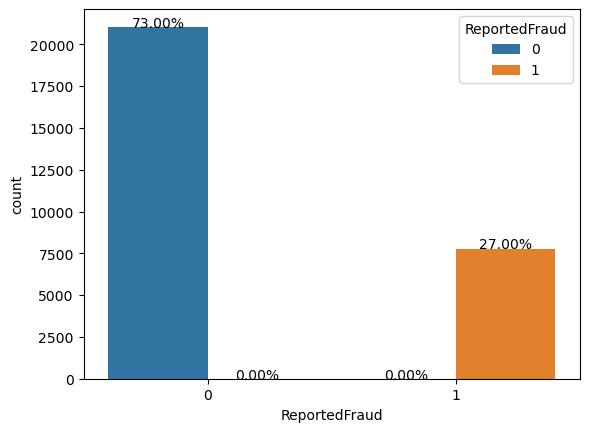

In [35]:
ax = sns.countplot(x = "ReportedFraud", hue = "ReportedFraud", data = merged_train)
total = float(len(merged_train["ReportedFraud"]))  # total count of all data points
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, '{:1.2f}%'.format((height/total)*100),
            ha="center", fontsize=10)  # add percentage
plt.show()

In [36]:
merged_train["TypeOfIncident"].value_counts()

Multi-vehicle Collision     11966
Single Vehicle Collision    11677
Vehicle Theft                2685
Parked Car                   2508
Name: TypeOfIncident, dtype: int64

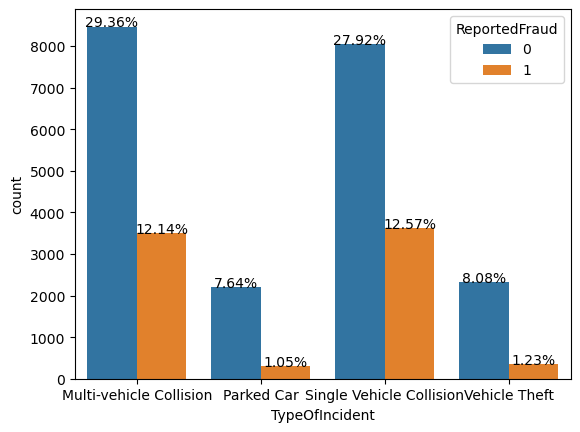

In [37]:
# add the count values and percentages on top of each bar
ax = sns.countplot(x = merged_train["TypeOfIncident"], hue = "ReportedFraud", data = merged_train)
total = float(len(merged_train["TypeOfIncident"]))  # total count of all data points
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, '{:1.2f}%'.format((height/total)*100),
            ha="center", fontsize=10)  # add percentage
plt.show()

In [38]:
merged_train["AuthoritiesContacted"].value_counts()

Police       8324
Fire         6518
Ambulance    5732
Other        5570
None         2692
Name: AuthoritiesContacted, dtype: int64

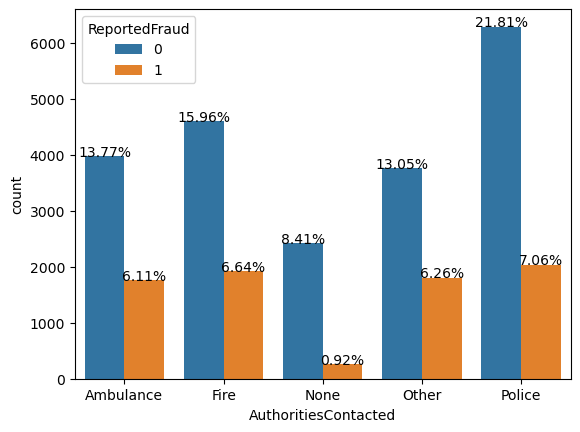

In [39]:
# add the count values and percentages on top of each bar
ax = sns.countplot(x = merged_train["AuthoritiesContacted"], hue = "ReportedFraud", data = merged_train)
total = float(len(merged_train["AuthoritiesContacted"]))  # total count of all data points
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, '{:1.2f}%'.format((height/total)*100),
            ha="center", fontsize=10)  # add percentage
plt.show()

In [40]:
import missingno as msno

<AxesSubplot:>

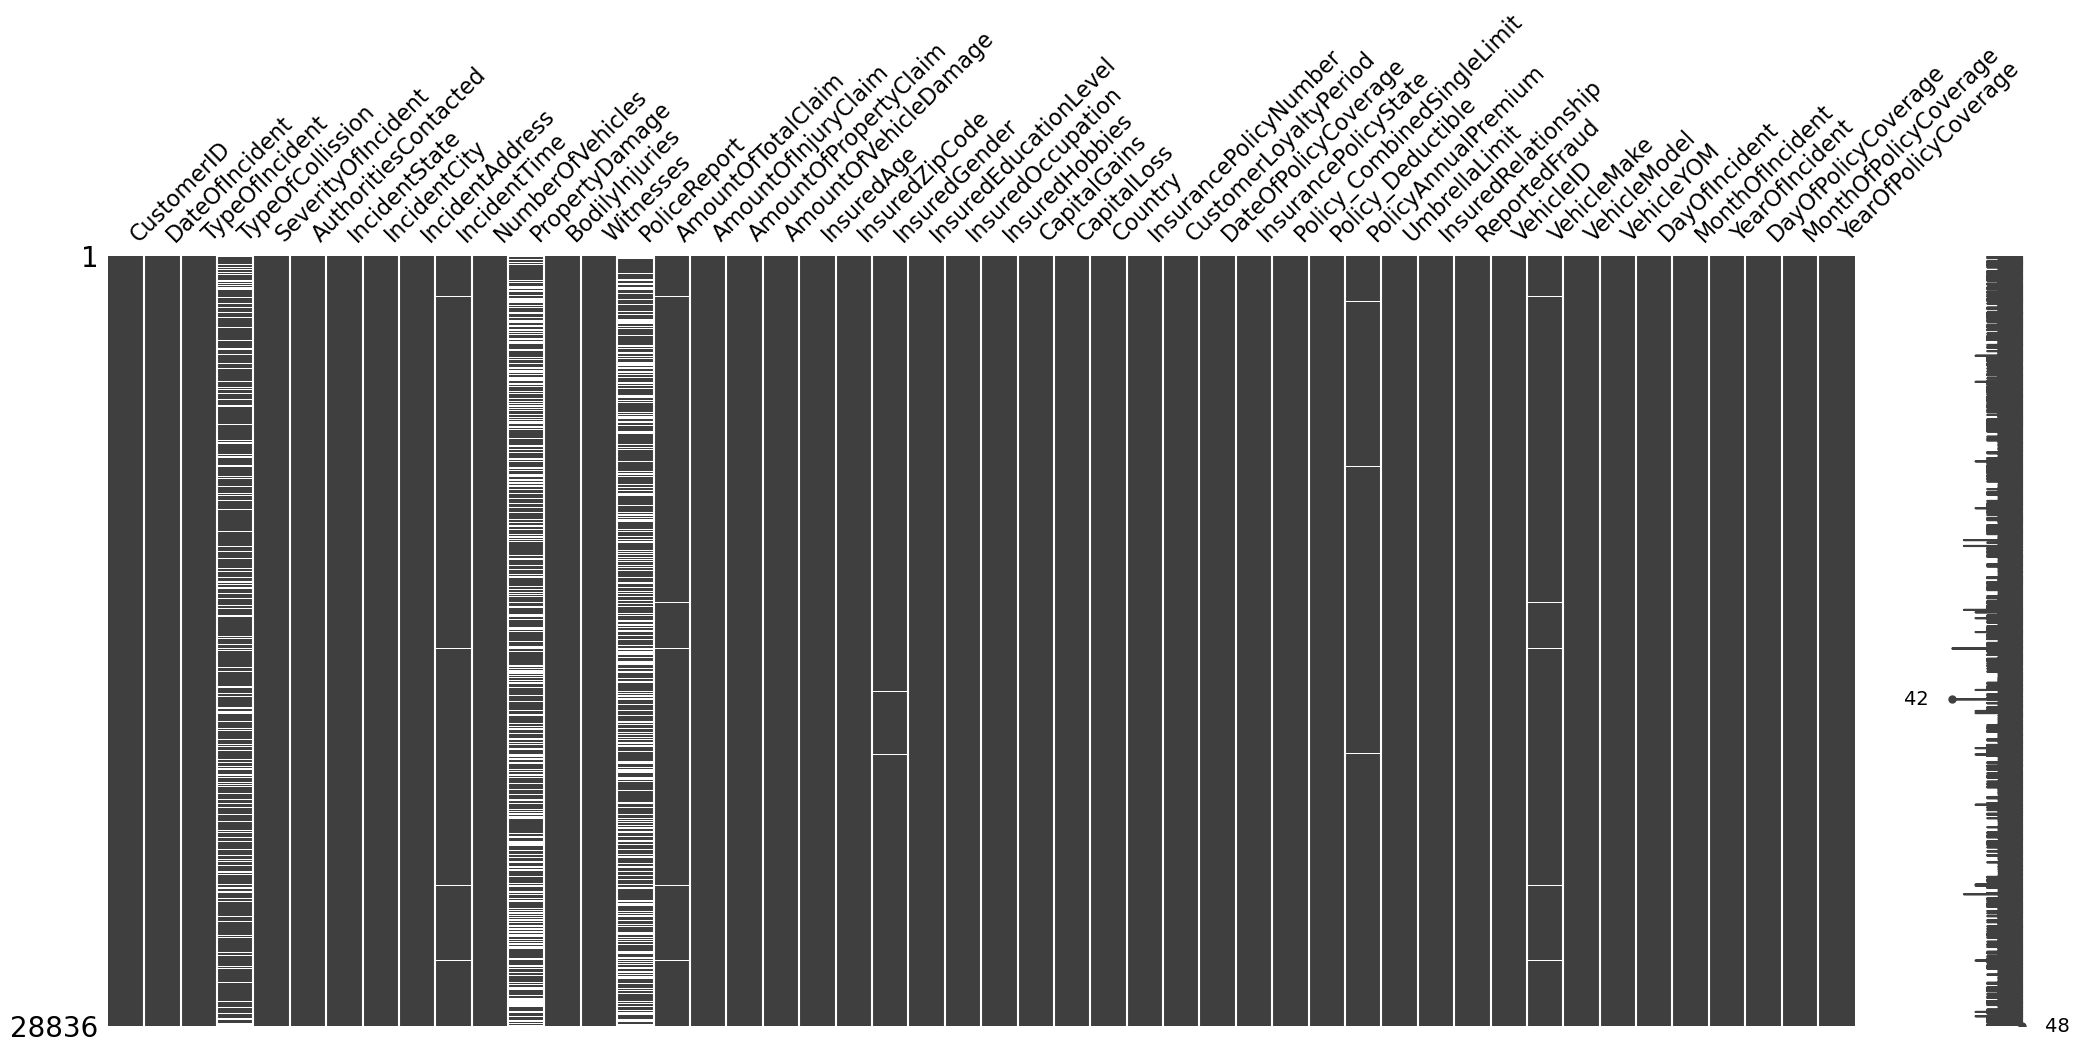

In [41]:
msno.matrix(merged_train)

In [42]:
nulls = merged_train.isnull().sum()*100/len(merged_train)
nulls = nulls.round(2)
nulls

CustomerID                     0.00
DateOfIncident                 0.00
TypeOfIncident                 0.00
TypeOfCollission              17.90
SeverityOfIncident             0.00
AuthoritiesContacted           0.00
IncidentState                  0.00
IncidentCity                   0.00
IncidentAddress                0.00
IncidentTime                   0.11
NumberOfVehicles               0.00
PropertyDamage                36.27
BodilyInjuries                 0.00
Witnesses                      0.00
PoliceReport                  34.00
AmountOfTotalClaim             0.17
AmountOfInjuryClaim            0.00
AmountOfPropertyClaim          0.00
AmountOfVehicleDamage          0.00
InsuredAge                     0.00
InsuredZipCode                 0.00
InsuredGender                  0.10
InsuredEducationLevel          0.00
InsuredOccupation              0.00
InsuredHobbies                 0.00
CapitalGains                   0.00
CapitalLoss                    0.00
Country                     

In [43]:
from scipy.stats import chi2_contingency

In [44]:
insignificant_columns = []
for column in merged_train.columns:
    contingency_table = pd.crosstab(merged_train[column], merged_train["ReportedFraud"])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    if p_value > 0.05: # Check if p-value is greater than 0.05
        insignificant_columns.append(column)

In [45]:
print(insignificant_columns)

['CustomerID', 'PoliceReport', 'Country', 'InsurancePolicyNumber', 'PolicyAnnualPremium', 'VehicleID', 'YearOfIncident']


## Dropping the columns based on Insignificant value i.e (thresold p_value > 0.05)

In [46]:
merged_train.drop(['CustomerID', 'PoliceReport', 'Country', 'InsurancePolicyNumber', 'PolicyAnnualPremium', 'VehicleID', 'YearOfIncident'],axis = 1, inplace = True)
merged_train.shape

(28836, 41)

<AxesSubplot:>

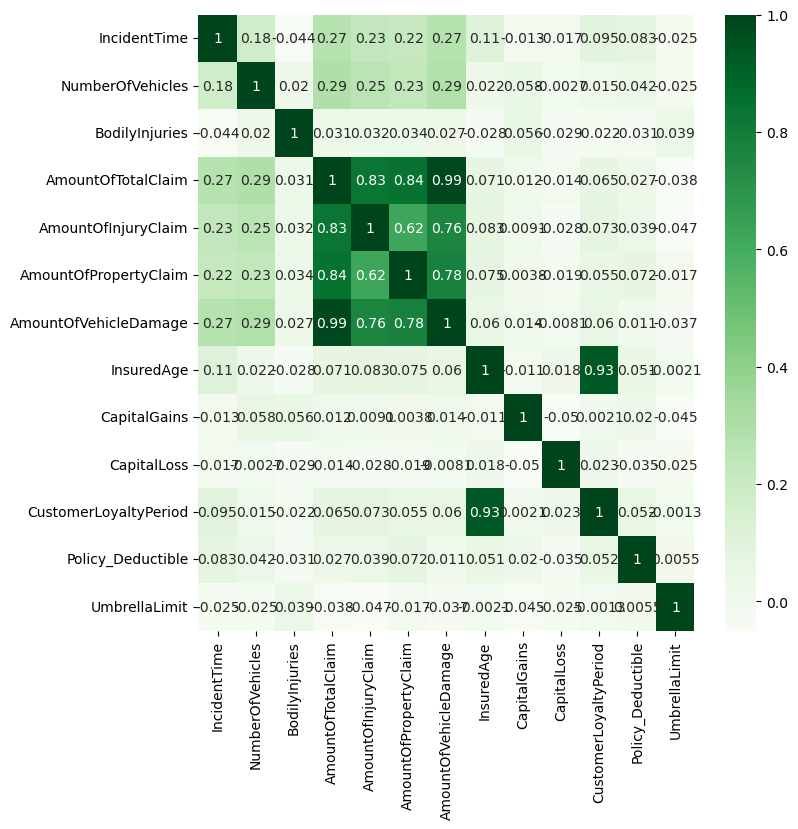

In [47]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(merged_train.corr(), annot = True, cmap = "Greens", ax=ax)

## Dropping the columns based on correlation

In [48]:
merged_train.shape

(28836, 41)

In [49]:
merged_train.columns

Index(['DateOfIncident', 'TypeOfIncident', 'TypeOfCollission',
       'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState',
       'IncidentCity', 'IncidentAddress', 'IncidentTime', 'NumberOfVehicles',
       'PropertyDamage', 'BodilyInjuries', 'Witnesses', 'AmountOfTotalClaim',
       'AmountOfInjuryClaim', 'AmountOfPropertyClaim', 'AmountOfVehicleDamage',
       'InsuredAge', 'InsuredZipCode', 'InsuredGender',
       'InsuredEducationLevel', 'InsuredOccupation', 'InsuredHobbies',
       'CapitalGains', 'CapitalLoss', 'CustomerLoyaltyPeriod',
       'DateOfPolicyCoverage', 'InsurancePolicyState',
       'Policy_CombinedSingleLimit', 'Policy_Deductible', 'UmbrellaLimit',
       'InsuredRelationship', 'ReportedFraud', 'VehicleMake', 'VehicleModel',
       'VehicleYOM', 'DayOfIncident', 'MonthOfIncident', 'DayOfPolicyCoverage',
       'MonthOfPolicyCoverage', 'YearOfPolicyCoverage'],
      dtype='object')

In [50]:
merged_train.drop(["AmountOfInjuryClaim","AmountOfPropertyClaim","AmountOfVehicleDamage","InsuredAge"],axis = 1, inplace = True)
merged_train.shape

(28836, 37)

In [51]:
merged_train.columns

Index(['DateOfIncident', 'TypeOfIncident', 'TypeOfCollission',
       'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState',
       'IncidentCity', 'IncidentAddress', 'IncidentTime', 'NumberOfVehicles',
       'PropertyDamage', 'BodilyInjuries', 'Witnesses', 'AmountOfTotalClaim',
       'InsuredZipCode', 'InsuredGender', 'InsuredEducationLevel',
       'InsuredOccupation', 'InsuredHobbies', 'CapitalGains', 'CapitalLoss',
       'CustomerLoyaltyPeriod', 'DateOfPolicyCoverage', 'InsurancePolicyState',
       'Policy_CombinedSingleLimit', 'Policy_Deductible', 'UmbrellaLimit',
       'InsuredRelationship', 'ReportedFraud', 'VehicleMake', 'VehicleModel',
       'VehicleYOM', 'DayOfIncident', 'MonthOfIncident', 'DayOfPolicyCoverage',
       'MonthOfPolicyCoverage', 'YearOfPolicyCoverage'],
      dtype='object')

In [52]:
merged_train.drop(["DateOfIncident","IncidentCity","IncidentAddress","InsuredZipCode","InsuredEducationLevel","InsuredOccupation","InsuredHobbies","CapitalGains","CapitalLoss","InsurancePolicyState","DayOfIncident","MonthOfIncident","DayOfPolicyCoverage","MonthOfPolicyCoverage","DateOfPolicyCoverage","VehicleModel"],axis = 1, inplace = True)
merged_train.shape

(28836, 21)

In [53]:
merged_train.columns

Index(['TypeOfIncident', 'TypeOfCollission', 'SeverityOfIncident',
       'AuthoritiesContacted', 'IncidentState', 'IncidentTime',
       'NumberOfVehicles', 'PropertyDamage', 'BodilyInjuries', 'Witnesses',
       'AmountOfTotalClaim', 'InsuredGender', 'CustomerLoyaltyPeriod',
       'Policy_CombinedSingleLimit', 'Policy_Deductible', 'UmbrellaLimit',
       'InsuredRelationship', 'ReportedFraud', 'VehicleMake', 'VehicleYOM',
       'YearOfPolicyCoverage'],
      dtype='object')

In [54]:
merged_train.dtypes

TypeOfIncident                category
TypeOfCollission              category
SeverityOfIncident            category
AuthoritiesContacted          category
IncidentState                 category
IncidentTime                   float64
NumberOfVehicles                 int64
PropertyDamage                category
BodilyInjuries                   int64
Witnesses                     category
AmountOfTotalClaim             float64
InsuredGender                 category
CustomerLoyaltyPeriod            int64
Policy_CombinedSingleLimit    category
Policy_Deductible                int64
UmbrellaLimit                    int64
InsuredRelationship           category
ReportedFraud                 category
VehicleMake                   category
VehicleYOM                    category
YearOfPolicyCoverage          category
dtype: object

In [55]:
cat_cols = ["TypeOfIncident","TypeOfCollission","SeverityOfIncident","AuthoritiesContacted","IncidentState","PropertyDamage","Witnesses","InsuredGender","Policy_CombinedSingleLimit","InsuredRelationship","VehicleMake","VehicleYOM"]
num_cols = ["IncidentTime","NumberOfVehicles","BodilyInjuries","AmountOfTotalClaim","CustomerLoyaltyPeriod","Policy_Deductible","UmbrellaLimit"]

In [56]:
cat_cols

['TypeOfIncident',
 'TypeOfCollission',
 'SeverityOfIncident',
 'AuthoritiesContacted',
 'IncidentState',
 'PropertyDamage',
 'Witnesses',
 'InsuredGender',
 'Policy_CombinedSingleLimit',
 'InsuredRelationship',
 'VehicleMake',
 'VehicleYOM']

In [57]:
X = merged_train.drop(["ReportedFraud"],axis = 1)
y = merged_train["ReportedFraud"]

In [58]:
X

,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,AmountOfTotalClaim,InsuredGender,CustomerLoyaltyPeriod,Policy_CombinedSingleLimit,Policy_Deductible,UmbrellaLimit,InsuredRelationship,VehicleMake,VehicleYOM,YearOfPolicyCoverage
0,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,17.0,3,NaN,1,0,65501.0,MALE,49,100/300,1000,0,not-in-family,Audi,2008,1998
1,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,10.0,3,YES,2,1,61382.0,MALE,114,100/300,1000,0,not-in-family,Audi,2006,2000
2,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,22.0,1,YES,2,3,66755.0,MALE,167,500/1000,617,0,wife,Volkswagen,1999,2001
3,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,22.0,1,YES,2,3,66243.0,MALE,190,500/1000,722,0,own-child,Volkswagen,2003,2005
4,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,10.0,1,NO,2,1,53544.0,FEMALE,115,100/300,500,4279863,unmarried,Toyota,2010,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,Vehicle Theft,NaN,Trivial Damage,Police,State9,3.0,1,NO,0,3,6590.0,MALE,321,500/1000,655,0,unmarried,Suburu,2007,1998
28832,Single Vehicle Collision,Front Collision,Minor Damage,Fire,State8,17.0,1,YES,0,2,74547.0,MALE,237,100/300,1089,0,unmarried,Jeep,2003,2004
28833,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State9,1.0,1,YES,2,0,55305.0,MALE,392,250/500,787,3448735,own-child,Suburu,2004,1998
28834,Single Vehicle Collision,Rear Collision,Minor Damage,Ambulance,State9,1.0,1,NaN,2,0,55830.0,MALE,391,250/500,780,3364301,not-in-family,Suburu,2004,1998


In [59]:
pd.DataFrame(y)

,ReportedFraud
0,0
1,0
2,0
3,0
4,0
...,...
28831,0
28832,0
28833,0
28834,0


In [60]:
# detecting ouliers for all before removing 
Q1 = merged_train[num_cols].quantile(0.25)
Q3 = merged_train[num_cols].quantile(0.75)
IQR = Q3-Q1

before_rvm_outliers = ((merged_train[num_cols]<(Q1-1.5*IQR)) | (merged_train[num_cols]>(Q3+1.5*IQR))).sum()
before_rvm_outliers

IncidentTime                0
NumberOfVehicles            0
BodilyInjuries              0
AmountOfTotalClaim       4934
CustomerLoyaltyPeriod       2
Policy_Deductible           0
UmbrellaLimit            6455
dtype: int64

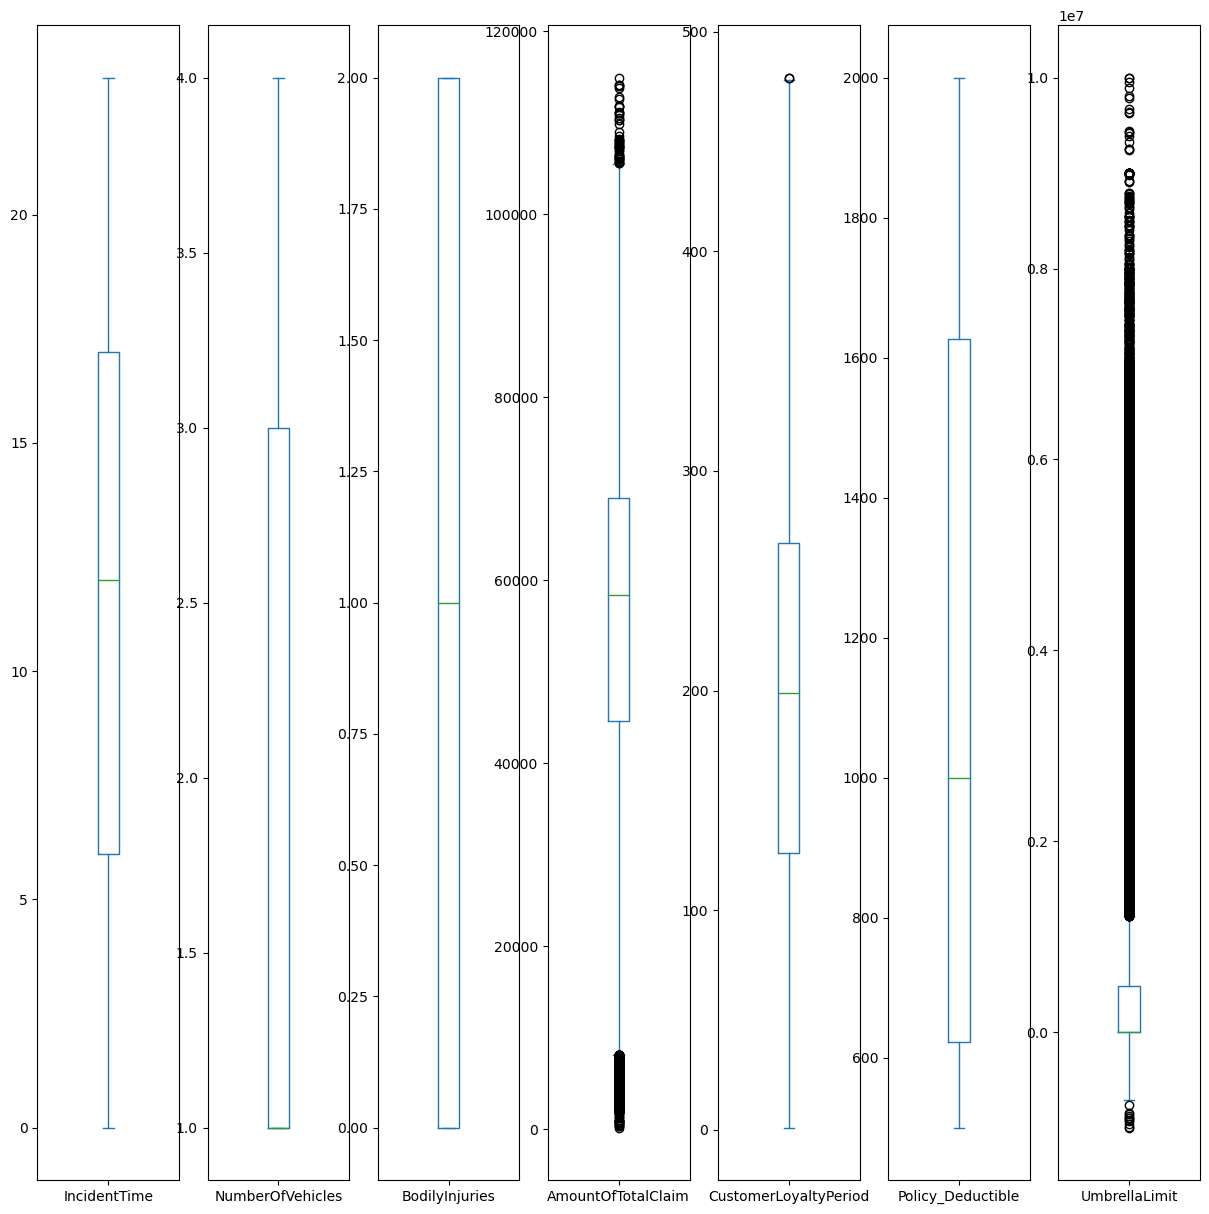

In [61]:
#boxplot for all the numerical attributes in dataframe
merged_train.plot(kind ='box',subplots = True,sharex= False,sharey=False,figsize=(15,15))
plt.show()

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y, stratify = y,test_size=0.3,random_state=107)

In [63]:
print("X_train is :   ", X_train.shape)
print("X_val is   :   ", X_val.shape)
print("y_train is :   ", y_train.shape)
print("y_val is   :   ", y_val.shape)

X_train is :    (20185, 20)
X_val is   :    (8651, 20)
y_train is :    (20185,)
y_val is   :    (8651,)


In [64]:
X_train

,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,AmountOfTotalClaim,InsuredGender,CustomerLoyaltyPeriod,Policy_CombinedSingleLimit,Policy_Deductible,UmbrellaLimit,InsuredRelationship,VehicleMake,VehicleYOM,YearOfPolicyCoverage
16689,Single Vehicle Collision,Side Collision,Minor Damage,Police,State5,13.0,1,YES,2,2,100295.0,FEMALE,149,500/1000,1063,0,wife,Dodge,1998,2011
21197,Multi-vehicle Collision,Front Collision,Minor Damage,Police,State9,10.0,3,YES,2,0,89906.0,MALE,252,500/1000,2000,1030634,unmarried,Dodge,2006,2010
2423,Multi-vehicle Collision,Side Collision,Total Loss,Other,State7,19.0,4,YES,2,0,63753.0,MALE,174,250/500,500,0,other-relative,Audi,2001,2007
19635,Single Vehicle Collision,Rear Collision,Minor Damage,Ambulance,State7,16.0,1,YES,0,1,58935.0,FEMALE,258,250/500,1000,0,other-relative,Volkswagen,2003,2005
11241,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,State7,14.0,3,YES,0,2,67220.0,MALE,362,100/300,500,3130299,wife,Chevrolet,2004,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,Multi-vehicle Collision,Side Collision,Major Damage,Fire,State5,17.0,2,YES,1,0,53615.0,FEMALE,101,100/300,1826,4954557,wife,Ford,2013,2008
1012,Parked Car,NaN,Trivial Damage,Police,State5,4.0,1,NaN,0,2,5501.0,MALE,227,250/500,500,3619829,husband,Nissan,1999,2004
28538,Parked Car,NaN,Minor Damage,None,State9,14.0,1,YES,2,2,7910.0,FEMALE,200,250/1000,1000,5661407,wife,Saab,2004,2010
20991,Single Vehicle Collision,Front Collision,Total Loss,Ambulance,State7,12.0,1,YES,1,0,63001.0,MALE,83,250/1000,632,2209736,wife,Saab,1999,1996


In [65]:
y_train

16689    0
21197    0
2423     0
19635    0
11241    0
        ..
13995    1
1012     0
28538    0
20991    0
10838    0
Name: ReportedFraud, Length: 20185, dtype: category
Categories (2, int64): [0, 1]

In [66]:
X_val

,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,AmountOfTotalClaim,InsuredGender,CustomerLoyaltyPeriod,Policy_CombinedSingleLimit,Policy_Deductible,UmbrellaLimit,InsuredRelationship,VehicleMake,VehicleYOM,YearOfPolicyCoverage
8781,Multi-vehicle Collision,Side Collision,Total Loss,Other,State8,14.0,4,NO,2,3,53822.0,FEMALE,158,500/1000,2000,0,own-child,Suburu,2003,2010
23575,Single Vehicle Collision,Rear Collision,Total Loss,Ambulance,State5,9.0,1,NaN,0,0,74610.0,FEMALE,60,100/300,873,0,not-in-family,BMW,2011,1995
21587,Parked Car,NaN,Minor Damage,Police,State4,4.0,1,NO,1,2,2383.0,FEMALE,238,100/500,638,0,other-relative,Toyota,2005,1995
2607,Single Vehicle Collision,Front Collision,Minor Damage,Fire,State9,17.0,1,NaN,2,2,64730.0,MALE,290,500/500,885,0,wife,Toyota,1998,2014
22955,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,14.0,3,YES,1,0,63888.0,MALE,74,100/300,1000,0,other-relative,Audi,2007,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5007,Multi-vehicle Collision,Rear Collision,Major Damage,Other,State7,19.0,3,YES,0,3,47264.0,FEMALE,109,500/1000,2000,0,husband,Accura,2011,1998
24553,Single Vehicle Collision,Front Collision,Total Loss,Fire,State9,3.0,1,NO,0,1,68057.0,FEMALE,277,500/300,2000,0,other-relative,Saab,1999,1998
14869,Multi-vehicle Collision,Front Collision,Total Loss,Ambulance,State7,11.0,2,NaN,1,1,62151.0,FEMALE,281,100/300,2000,0,husband,Volkswagen,1999,1992
14118,Single Vehicle Collision,Rear Collision,Total Loss,Other,State9,3.0,1,YES,0,1,104649.0,FEMALE,151,500/500,500,0,other-relative,Dodge,1999,2005


In [67]:
y_val

8781     0
23575    0
21587    0
2607     0
22955    0
        ..
5007     0
24553    1
14869    0
14118    0
14206    0
Name: ReportedFraud, Length: 8651, dtype: category
Categories (2, int64): [0, 1]

In [68]:
y_train.value_counts(normalize = True)

0    0.730047
1    0.269953
Name: ReportedFraud, dtype: float64

In [69]:
y_val.value_counts(normalize = True)

0    0.729973
1    0.270027
Name: ReportedFraud, dtype: float64

In [70]:
X_train.isnull().sum()

TypeOfIncident                   0
TypeOfCollission              3600
SeverityOfIncident               0
AuthoritiesContacted             0
IncidentState                    0
IncidentTime                    23
NumberOfVehicles                 0
PropertyDamage                7336
BodilyInjuries                   0
Witnesses                        0
AmountOfTotalClaim              37
InsuredGender                   26
CustomerLoyaltyPeriod            0
Policy_CombinedSingleLimit       0
Policy_Deductible                0
UmbrellaLimit                    0
InsuredRelationship              0
VehicleMake                     37
VehicleYOM                       0
YearOfPolicyCoverage             0
dtype: int64

In [71]:
X_val.isnull().sum()

TypeOfIncident                   0
TypeOfCollission              1562
SeverityOfIncident               0
AuthoritiesContacted             0
IncidentState                    0
IncidentTime                     8
NumberOfVehicles                 0
PropertyDamage                3123
BodilyInjuries                   0
Witnesses                        0
AmountOfTotalClaim              13
InsuredGender                    4
CustomerLoyaltyPeriod            0
Policy_CombinedSingleLimit       0
Policy_Deductible                0
UmbrellaLimit                    0
InsuredRelationship              0
VehicleMake                     13
VehicleYOM                       0
YearOfPolicyCoverage             0
dtype: int64

In [72]:
# importing  SimpleImputer to impute null values
from sklearn.impute import SimpleImputer

In [73]:
# fitting the X_train[num_cols] in imputer model
num_cols_imputer = SimpleImputer(strategy='median')
num_cols_imputer = num_cols_imputer.fit(X_train[num_cols])

In [74]:
# fitting the X_train[num_cols] and X_test[num_cols] in imputer model
X_train[num_cols] = num_cols_imputer.transform(X_train[num_cols])
X_val[num_cols] = num_cols_imputer.transform(X_val[num_cols])

In [75]:
X_train.isnull().sum()

TypeOfIncident                   0
TypeOfCollission              3600
SeverityOfIncident               0
AuthoritiesContacted             0
IncidentState                    0
IncidentTime                     0
NumberOfVehicles                 0
PropertyDamage                7336
BodilyInjuries                   0
Witnesses                        0
AmountOfTotalClaim               0
InsuredGender                   26
CustomerLoyaltyPeriod            0
Policy_CombinedSingleLimit       0
Policy_Deductible                0
UmbrellaLimit                    0
InsuredRelationship              0
VehicleMake                     37
VehicleYOM                       0
YearOfPolicyCoverage             0
dtype: int64

In [76]:
X_val.isnull().sum()

TypeOfIncident                   0
TypeOfCollission              1562
SeverityOfIncident               0
AuthoritiesContacted             0
IncidentState                    0
IncidentTime                     0
NumberOfVehicles                 0
PropertyDamage                3123
BodilyInjuries                   0
Witnesses                        0
AmountOfTotalClaim               0
InsuredGender                    4
CustomerLoyaltyPeriod            0
Policy_CombinedSingleLimit       0
Policy_Deductible                0
UmbrellaLimit                    0
InsuredRelationship              0
VehicleMake                     13
VehicleYOM                       0
YearOfPolicyCoverage             0
dtype: int64

In [77]:
# fitting the X_train[cat_cols] in imputer model
cat_cols_imputer = SimpleImputer(strategy='most_frequent')
cat_cols_imputer = cat_cols_imputer.fit(X_train[cat_cols])

In [78]:
# fitting the X_train[cat_cols] and X_test[cat_cols] in imputer model
X_train[cat_cols] = cat_cols_imputer.transform(X_train[cat_cols])
X_val[cat_cols] = cat_cols_imputer.transform(X_val[cat_cols])

In [79]:
X_train.isnull().sum()

TypeOfIncident                0
TypeOfCollission              0
SeverityOfIncident            0
AuthoritiesContacted          0
IncidentState                 0
IncidentTime                  0
NumberOfVehicles              0
PropertyDamage                0
BodilyInjuries                0
Witnesses                     0
AmountOfTotalClaim            0
InsuredGender                 0
CustomerLoyaltyPeriod         0
Policy_CombinedSingleLimit    0
Policy_Deductible             0
UmbrellaLimit                 0
InsuredRelationship           0
VehicleMake                   0
VehicleYOM                    0
YearOfPolicyCoverage          0
dtype: int64

In [80]:
X_val.isnull().sum()

TypeOfIncident                0
TypeOfCollission              0
SeverityOfIncident            0
AuthoritiesContacted          0
IncidentState                 0
IncidentTime                  0
NumberOfVehicles              0
PropertyDamage                0
BodilyInjuries                0
Witnesses                     0
AmountOfTotalClaim            0
InsuredGender                 0
CustomerLoyaltyPeriod         0
Policy_CombinedSingleLimit    0
Policy_Deductible             0
UmbrellaLimit                 0
InsuredRelationship           0
VehicleMake                   0
VehicleYOM                    0
YearOfPolicyCoverage          0
dtype: int64

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
# fitting the X_train[num_cols] in standardization model
scaler = StandardScaler()
scaler = scaler.fit(X_train[num_cols])

In [83]:
# fitting the X_train[num_cols] and X_test[num_cols] in standardization model
X_train_std = pd.DataFrame(scaler.transform(X_train[num_cols]), columns = X_train[num_cols].columns)
X_val_std = pd.DataFrame(scaler.transform(X_val[num_cols]), columns = X_val[num_cols].columns)

In [84]:
X_train_std

,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfTotalClaim,CustomerLoyaltyPeriod,Policy_Deductible,UmbrellaLimit
0,0.202457,-0.838071,1.293685,1.915611,-0.546703,-0.088961,-0.496822
1,-0.284777,1.203378,1.293685,1.500997,0.485233,1.627245,0.031574
2,1.176923,2.224103,1.293685,0.457259,-0.296233,-1.120149,-0.496822
3,0.689690,-0.838071,-1.254923,0.264977,0.545346,-0.204351,-0.496822
4,0.364868,1.203378,-1.254923,0.595623,1.587300,-1.120149,1.108053
...,...,...,...,...,...,...,...
20180,0.852101,0.182653,0.019381,0.052662,-1.027605,1.308547,2.043333
20181,-1.259243,-0.838071,-1.254923,-1.867516,0.234763,-1.120149,1.359030
20182,0.364868,-0.838071,1.293685,-1.771375,-0.035745,-0.204351,2.405728
20183,0.040046,-0.838071,0.019381,0.427247,-1.207944,-0.878379,0.636088


In [85]:
X_val_std

,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfTotalClaim,CustomerLoyaltyPeriod,Policy_Deductible,UmbrellaLimit
0,0.364868,2.224103,1.293685,0.060923,-0.456534,1.627245,-0.496822
1,-0.447188,-0.838071,-1.254923,0.890550,-1.438376,-0.436964,-0.496822
2,-1.259243,-0.838071,0.019381,-1.991952,0.344970,-0.867389,-0.496822
3,0.852101,-0.838071,1.293685,0.496250,0.865947,-0.414985,-0.496822
4,0.364868,1.203378,0.019381,0.462646,-1.298113,-0.204351,-0.496822
...,...,...,...,...,...,...,...
8646,1.176923,1.203378,-1.254923,-0.200800,-0.947455,1.627245,-0.496822
8647,-1.421654,-0.838071,-1.254923,0.629027,0.735703,1.627245,-0.496822
8648,-0.122365,0.182653,0.019381,0.393325,0.775778,1.627245,-0.496822
8649,-1.421654,-0.838071,-1.254923,2.089374,-0.526666,-1.120149,-0.496822


In [86]:
X_train_std.isnull().sum()

IncidentTime             0
NumberOfVehicles         0
BodilyInjuries           0
AmountOfTotalClaim       0
CustomerLoyaltyPeriod    0
Policy_Deductible        0
UmbrellaLimit            0
dtype: int64

In [87]:
X_val_std.isnull().sum()

IncidentTime             0
NumberOfVehicles         0
BodilyInjuries           0
AmountOfTotalClaim       0
CustomerLoyaltyPeriod    0
Policy_Deductible        0
UmbrellaLimit            0
dtype: int64

In [88]:
# creationg dummies for cat_cols from X_train
X_train_dummies = pd.get_dummies(X_train[cat_cols],drop_first = True)

In [89]:
X_train_dummies

,TypeOfIncident_Parked Car,TypeOfIncident_Single Vehicle Collision,TypeOfIncident_Vehicle Theft,TypeOfCollission_Rear Collision,TypeOfCollission_Side Collision,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage,AuthoritiesContacted_Fire,AuthoritiesContacted_None,...,VehicleYOM_2006,VehicleYOM_2007,VehicleYOM_2008,VehicleYOM_2009,VehicleYOM_2010,VehicleYOM_2011,VehicleYOM_2012,VehicleYOM_2013,VehicleYOM_2014,VehicleYOM_2015
16689,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21197,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2423,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19635,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11241,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1012,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
28538,1,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
20991,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
# creationg dummies for cat_cols from X_test
X_val_dummies = pd.get_dummies(X_val[cat_cols],drop_first = True)

In [91]:
X_val_dummies

,TypeOfIncident_Parked Car,TypeOfIncident_Single Vehicle Collision,TypeOfIncident_Vehicle Theft,TypeOfCollission_Rear Collision,TypeOfCollission_Side Collision,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage,AuthoritiesContacted_Fire,AuthoritiesContacted_None,...,VehicleYOM_2006,VehicleYOM_2007,VehicleYOM_2008,VehicleYOM_2009,VehicleYOM_2010,VehicleYOM_2011,VehicleYOM_2012,VehicleYOM_2013,VehicleYOM_2014,VehicleYOM_2015
8781,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23575,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
21587,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2607,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
22955,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5007,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
24553,0,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
14869,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14118,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
X_train_dummies.isnull().sum()

TypeOfIncident_Parked Car                  0
TypeOfIncident_Single Vehicle Collision    0
TypeOfIncident_Vehicle Theft               0
TypeOfCollission_Rear Collision            0
TypeOfCollission_Side Collision            0
                                          ..
VehicleYOM_2011                            0
VehicleYOM_2012                            0
VehicleYOM_2013                            0
VehicleYOM_2014                            0
VehicleYOM_2015                            0
Length: 70, dtype: int64

In [93]:
X_val_dummies.isnull().sum()

TypeOfIncident_Parked Car                  0
TypeOfIncident_Single Vehicle Collision    0
TypeOfIncident_Vehicle Theft               0
TypeOfCollission_Rear Collision            0
TypeOfCollission_Side Collision            0
                                          ..
VehicleYOM_2011                            0
VehicleYOM_2012                            0
VehicleYOM_2013                            0
VehicleYOM_2014                            0
VehicleYOM_2015                            0
Length: 70, dtype: int64

In [94]:
# resetting the index to concat correctly
X_train_std = X_train_std.reset_index()
X_train_std

,index,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfTotalClaim,CustomerLoyaltyPeriod,Policy_Deductible,UmbrellaLimit
0,0,0.202457,-0.838071,1.293685,1.915611,-0.546703,-0.088961,-0.496822
1,1,-0.284777,1.203378,1.293685,1.500997,0.485233,1.627245,0.031574
2,2,1.176923,2.224103,1.293685,0.457259,-0.296233,-1.120149,-0.496822
3,3,0.689690,-0.838071,-1.254923,0.264977,0.545346,-0.204351,-0.496822
4,4,0.364868,1.203378,-1.254923,0.595623,1.587300,-1.120149,1.108053
...,...,...,...,...,...,...,...,...
20180,20180,0.852101,0.182653,0.019381,0.052662,-1.027605,1.308547,2.043333
20181,20181,-1.259243,-0.838071,-1.254923,-1.867516,0.234763,-1.120149,1.359030
20182,20182,0.364868,-0.838071,1.293685,-1.771375,-0.035745,-0.204351,2.405728
20183,20183,0.040046,-0.838071,0.019381,0.427247,-1.207944,-0.878379,0.636088


In [95]:
# dropping the index column 
X_train_std = X_train_std.drop(["index"], axis = 1)
X_train_std

,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfTotalClaim,CustomerLoyaltyPeriod,Policy_Deductible,UmbrellaLimit
0,0.202457,-0.838071,1.293685,1.915611,-0.546703,-0.088961,-0.496822
1,-0.284777,1.203378,1.293685,1.500997,0.485233,1.627245,0.031574
2,1.176923,2.224103,1.293685,0.457259,-0.296233,-1.120149,-0.496822
3,0.689690,-0.838071,-1.254923,0.264977,0.545346,-0.204351,-0.496822
4,0.364868,1.203378,-1.254923,0.595623,1.587300,-1.120149,1.108053
...,...,...,...,...,...,...,...
20180,0.852101,0.182653,0.019381,0.052662,-1.027605,1.308547,2.043333
20181,-1.259243,-0.838071,-1.254923,-1.867516,0.234763,-1.120149,1.359030
20182,0.364868,-0.838071,1.293685,-1.771375,-0.035745,-0.204351,2.405728
20183,0.040046,-0.838071,0.019381,0.427247,-1.207944,-0.878379,0.636088


In [96]:
# resetting the index to concat correctly
X_val_std = X_val_std.reset_index()
X_val_std

,index,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfTotalClaim,CustomerLoyaltyPeriod,Policy_Deductible,UmbrellaLimit
0,0,0.364868,2.224103,1.293685,0.060923,-0.456534,1.627245,-0.496822
1,1,-0.447188,-0.838071,-1.254923,0.890550,-1.438376,-0.436964,-0.496822
2,2,-1.259243,-0.838071,0.019381,-1.991952,0.344970,-0.867389,-0.496822
3,3,0.852101,-0.838071,1.293685,0.496250,0.865947,-0.414985,-0.496822
4,4,0.364868,1.203378,0.019381,0.462646,-1.298113,-0.204351,-0.496822
...,...,...,...,...,...,...,...,...
8646,8646,1.176923,1.203378,-1.254923,-0.200800,-0.947455,1.627245,-0.496822
8647,8647,-1.421654,-0.838071,-1.254923,0.629027,0.735703,1.627245,-0.496822
8648,8648,-0.122365,0.182653,0.019381,0.393325,0.775778,1.627245,-0.496822
8649,8649,-1.421654,-0.838071,-1.254923,2.089374,-0.526666,-1.120149,-0.496822


In [97]:
# dropping the index column 
X_val_std = X_val_std.drop(["index"], axis = 1)
X_val_std

,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfTotalClaim,CustomerLoyaltyPeriod,Policy_Deductible,UmbrellaLimit
0,0.364868,2.224103,1.293685,0.060923,-0.456534,1.627245,-0.496822
1,-0.447188,-0.838071,-1.254923,0.890550,-1.438376,-0.436964,-0.496822
2,-1.259243,-0.838071,0.019381,-1.991952,0.344970,-0.867389,-0.496822
3,0.852101,-0.838071,1.293685,0.496250,0.865947,-0.414985,-0.496822
4,0.364868,1.203378,0.019381,0.462646,-1.298113,-0.204351,-0.496822
...,...,...,...,...,...,...,...
8646,1.176923,1.203378,-1.254923,-0.200800,-0.947455,1.627245,-0.496822
8647,-1.421654,-0.838071,-1.254923,0.629027,0.735703,1.627245,-0.496822
8648,-0.122365,0.182653,0.019381,0.393325,0.775778,1.627245,-0.496822
8649,-1.421654,-0.838071,-1.254923,2.089374,-0.526666,-1.120149,-0.496822


In [98]:
# resetting the index to concat correctly
X_train_dummies = X_train_dummies.reset_index()
X_train_dummies

,index,TypeOfIncident_Parked Car,TypeOfIncident_Single Vehicle Collision,TypeOfIncident_Vehicle Theft,TypeOfCollission_Rear Collision,TypeOfCollission_Side Collision,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage,AuthoritiesContacted_Fire,...,VehicleYOM_2006,VehicleYOM_2007,VehicleYOM_2008,VehicleYOM_2009,VehicleYOM_2010,VehicleYOM_2011,VehicleYOM_2012,VehicleYOM_2013,VehicleYOM_2014,VehicleYOM_2015
0,16689,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,21197,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2423,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,19635,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,11241,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20180,13995,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
20181,1012,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
20182,28538,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20183,20991,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
# dropping the index column 
X_train_dummies = X_train_dummies.drop(["index"], axis = 1)
X_train_dummies

,TypeOfIncident_Parked Car,TypeOfIncident_Single Vehicle Collision,TypeOfIncident_Vehicle Theft,TypeOfCollission_Rear Collision,TypeOfCollission_Side Collision,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage,AuthoritiesContacted_Fire,AuthoritiesContacted_None,...,VehicleYOM_2006,VehicleYOM_2007,VehicleYOM_2008,VehicleYOM_2009,VehicleYOM_2010,VehicleYOM_2011,VehicleYOM_2012,VehicleYOM_2013,VehicleYOM_2014,VehicleYOM_2015
0,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20180,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
20181,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
20182,1,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
20183,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
# resetting the index to concat correctly
X_val_dummies = X_val_dummies.reset_index()
X_val_dummies

,index,TypeOfIncident_Parked Car,TypeOfIncident_Single Vehicle Collision,TypeOfIncident_Vehicle Theft,TypeOfCollission_Rear Collision,TypeOfCollission_Side Collision,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage,AuthoritiesContacted_Fire,...,VehicleYOM_2006,VehicleYOM_2007,VehicleYOM_2008,VehicleYOM_2009,VehicleYOM_2010,VehicleYOM_2011,VehicleYOM_2012,VehicleYOM_2013,VehicleYOM_2014,VehicleYOM_2015
0,8781,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,23575,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,21587,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2607,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,22955,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8646,5007,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8647,24553,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
8648,14869,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8649,14118,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
# dropping the index column 
X_val_dummies = X_val_dummies.drop(["index"], axis = 1)
X_val_dummies

,TypeOfIncident_Parked Car,TypeOfIncident_Single Vehicle Collision,TypeOfIncident_Vehicle Theft,TypeOfCollission_Rear Collision,TypeOfCollission_Side Collision,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage,AuthoritiesContacted_Fire,AuthoritiesContacted_None,...,VehicleYOM_2006,VehicleYOM_2007,VehicleYOM_2008,VehicleYOM_2009,VehicleYOM_2010,VehicleYOM_2011,VehicleYOM_2012,VehicleYOM_2013,VehicleYOM_2014,VehicleYOM_2015
0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8646,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8647,0,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8648,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8649,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
X_train_dummies.isnull().sum()

TypeOfIncident_Parked Car                  0
TypeOfIncident_Single Vehicle Collision    0
TypeOfIncident_Vehicle Theft               0
TypeOfCollission_Rear Collision            0
TypeOfCollission_Side Collision            0
                                          ..
VehicleYOM_2011                            0
VehicleYOM_2012                            0
VehicleYOM_2013                            0
VehicleYOM_2014                            0
VehicleYOM_2015                            0
Length: 70, dtype: int64

In [103]:
X_val_dummies.isnull().sum()

TypeOfIncident_Parked Car                  0
TypeOfIncident_Single Vehicle Collision    0
TypeOfIncident_Vehicle Theft               0
TypeOfCollission_Rear Collision            0
TypeOfCollission_Side Collision            0
                                          ..
VehicleYOM_2011                            0
VehicleYOM_2012                            0
VehicleYOM_2013                            0
VehicleYOM_2014                            0
VehicleYOM_2015                            0
Length: 70, dtype: int64

In [104]:
# Concating the X_train_std, X_train_dummies as final_X_train_data
final_X_train = pd.concat([X_train_std,X_train_dummies], axis = 1)

In [105]:
final_X_train

,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfTotalClaim,CustomerLoyaltyPeriod,Policy_Deductible,UmbrellaLimit,TypeOfIncident_Parked Car,TypeOfIncident_Single Vehicle Collision,TypeOfIncident_Vehicle Theft,...,VehicleYOM_2006,VehicleYOM_2007,VehicleYOM_2008,VehicleYOM_2009,VehicleYOM_2010,VehicleYOM_2011,VehicleYOM_2012,VehicleYOM_2013,VehicleYOM_2014,VehicleYOM_2015
0,0.202457,-0.838071,1.293685,1.915611,-0.546703,-0.088961,-0.496822,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.284777,1.203378,1.293685,1.500997,0.485233,1.627245,0.031574,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.176923,2.224103,1.293685,0.457259,-0.296233,-1.120149,-0.496822,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.689690,-0.838071,-1.254923,0.264977,0.545346,-0.204351,-0.496822,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.364868,1.203378,-1.254923,0.595623,1.587300,-1.120149,1.108053,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20180,0.852101,0.182653,0.019381,0.052662,-1.027605,1.308547,2.043333,0,0,0,...,0,0,0,0,0,0,0,1,0,0
20181,-1.259243,-0.838071,-1.254923,-1.867516,0.234763,-1.120149,1.359030,1,0,0,...,0,0,0,0,0,0,0,0,0,0
20182,0.364868,-0.838071,1.293685,-1.771375,-0.035745,-0.204351,2.405728,1,0,0,...,0,0,0,0,0,0,0,0,0,0
20183,0.040046,-0.838071,0.019381,0.427247,-1.207944,-0.878379,0.636088,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
# Concating the X_test_std, X_test_dummies as final_X_test_data
final_X_val = pd.concat([X_val_std,X_val_dummies], axis = 1)

In [107]:
final_X_val

,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfTotalClaim,CustomerLoyaltyPeriod,Policy_Deductible,UmbrellaLimit,TypeOfIncident_Parked Car,TypeOfIncident_Single Vehicle Collision,TypeOfIncident_Vehicle Theft,...,VehicleYOM_2006,VehicleYOM_2007,VehicleYOM_2008,VehicleYOM_2009,VehicleYOM_2010,VehicleYOM_2011,VehicleYOM_2012,VehicleYOM_2013,VehicleYOM_2014,VehicleYOM_2015
0,0.364868,2.224103,1.293685,0.060923,-0.456534,1.627245,-0.496822,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.447188,-0.838071,-1.254923,0.890550,-1.438376,-0.436964,-0.496822,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,-1.259243,-0.838071,0.019381,-1.991952,0.344970,-0.867389,-0.496822,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.852101,-0.838071,1.293685,0.496250,0.865947,-0.414985,-0.496822,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.364868,1.203378,0.019381,0.462646,-1.298113,-0.204351,-0.496822,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8646,1.176923,1.203378,-1.254923,-0.200800,-0.947455,1.627245,-0.496822,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8647,-1.421654,-0.838071,-1.254923,0.629027,0.735703,1.627245,-0.496822,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8648,-0.122365,0.182653,0.019381,0.393325,0.775778,1.627245,-0.496822,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8649,-1.421654,-0.838071,-1.254923,2.089374,-0.526666,-1.120149,-0.496822,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(final_X_train, y_train)

In [109]:
X_resampled

,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfTotalClaim,CustomerLoyaltyPeriod,Policy_Deductible,UmbrellaLimit,TypeOfIncident_Parked Car,TypeOfIncident_Single Vehicle Collision,TypeOfIncident_Vehicle Theft,...,VehicleYOM_2006,VehicleYOM_2007,VehicleYOM_2008,VehicleYOM_2009,VehicleYOM_2010,VehicleYOM_2011,VehicleYOM_2012,VehicleYOM_2013,VehicleYOM_2014,VehicleYOM_2015
0,0.202457,-0.838071,1.293685,1.915611,-0.546703,-0.088961,-0.496822,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.284777,1.203378,1.293685,1.500997,0.485233,1.627245,0.031574,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.176923,2.224103,1.293685,0.457259,-0.296233,-1.120149,-0.496822,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.689690,-0.838071,-1.254923,0.264977,0.545346,-0.204351,-0.496822,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.364868,1.203378,-1.254923,0.595623,1.587300,-1.120149,1.108053,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29467,1.664156,-0.838071,-1.254923,0.449713,0.675590,1.627245,-0.496822,0,1,0,...,1,0,0,0,0,0,0,0,0,0
29468,-0.934421,-0.838071,0.019381,-1.836636,1.571972,1.627245,0.119263,0,0,1,...,0,0,0,0,0,0,0,0,0,0
29469,0.360033,-0.838071,1.293685,0.718538,-1.391960,1.627245,1.698530,0,1,0,...,0,0,0,0,0,0,0,0,0,0
29470,0.286226,-0.838071,0.019381,0.643476,-0.919350,-1.120149,0.935904,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
y_resampled.value_counts(normalize = True)*100

0    50.0
1    50.0
Name: ReportedFraud, dtype: float64

In [111]:
# checking for null values for final_X_train_data (to check whether nulls is formed or not after concating)
final_X_train.isnull().sum()

IncidentTime             0
NumberOfVehicles         0
BodilyInjuries           0
AmountOfTotalClaim       0
CustomerLoyaltyPeriod    0
                        ..
VehicleYOM_2011          0
VehicleYOM_2012          0
VehicleYOM_2013          0
VehicleYOM_2014          0
VehicleYOM_2015          0
Length: 77, dtype: int64

In [112]:
final_X_val.isnull().sum()

IncidentTime             0
NumberOfVehicles         0
BodilyInjuries           0
AmountOfTotalClaim       0
CustomerLoyaltyPeriod    0
                        ..
VehicleYOM_2011          0
VehicleYOM_2012          0
VehicleYOM_2013          0
VehicleYOM_2014          0
VehicleYOM_2015          0
Length: 77, dtype: int64

# Model Building

## SVM

In [113]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# have to do gridsearchCv

In [114]:
'''param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [0.1, 1, 10, 100], 
              'kernel': ['linear', 'rbf']}'''

"param_grid = {'C': [0.1, 1, 10, 100], \n              'gamma': [0.1, 1, 10, 100], \n              'kernel': ['linear', 'rbf']}"

In [115]:
# Create the SVM model
# svm_model = SVC()

# Create the GridSearchCV object
# grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the data
# grid_search.fit(final_X_train, y_train)

In [116]:
#print("Best hyperparameters: ", grid_search.best_params_)

In [117]:
# model building by SVM algorithm
svm_model = SVC(kernel="rbf", C = 1, gamma = 0.1)
svm_model = svm_model.fit(final_X_train,y_train)

In [118]:
# predicting the y value for the train data
svm_model_y_train_preds = svm_model.predict(final_X_train)
svm_model_y_train_preds[0:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0])

In [119]:
# predicting the y value for the test data
svm_model_y_val_preds = svm_model.predict(final_X_val)
svm_model_y_val_preds[0:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0])

### Confusion Matrix

In [120]:
# import libraries of confusion_matrix and accuracy and recall
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,recall_score, f1_score

In [121]:
# finding the confusion_matrix for y_train actuals and y_train_predicts
confusionmatrix = confusion_matrix(y_train,svm_model_y_train_preds)
confusionmatrix

array([[14478,   258],
       [  901,  4548]])

In [122]:
# finding the confusion_matrix for y_test actuals and y_test_predicts
confusionmatrix = confusion_matrix(y_val,svm_model_y_val_preds)
confusionmatrix

array([[6161,  154],
       [ 548, 1788]])

### Accuracy and f1_Score

In [123]:
# finding the accuracy for y_train_actuals and y_train_predicts
accuracy_score(y_train,svm_model_y_train_preds)

0.9425811245974733

In [124]:
# finding the accuracy for y_test_actuals and y_test_predicts
accuracy_score(y_val,svm_model_y_val_preds)

TypeError: accuracy_score() got an unexpected keyword argument 'average'

In [ ]:
f1_score(y_train,svm_model_y_train_preds)

In [ ]:
f1_score(y_val,svm_model_y_val_preds)

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
param_grid = {'max_depth': [2, 4, 6, 8,10,12,14,16,18,20],
              'min_samples_split': [2, 4, 6, 8],
              'criterion': ['gini', 'entropy']}

In [ ]:
clf_model = DecisionTreeClassifier()

In [ ]:
grid_search = GridSearchCV(clf_model, param_grid=param_grid, cv=5)

In [ ]:
# fit the GridSearchCV object to the data
grid_search.fit(final_X_train, y_train)

# print the best hyperparameters
print(grid_search.best_params_)

In [ ]:
clf_model = DecisionTreeClassifier(criterion = "gini",max_depth = 16,min_samples_split = 8)
clf_model = clf_model.fit(final_X_train,y_train)

In [ ]:
# predicting the y value for the train data
clf_model_y_train_preds = clf_model.predict(final_X_train)
clf_model_y_train_preds[0:10]

In [ ]:
# predicting the y value for the test data
clf_model_y_val_preds = clf_model.predict(final_X_val)
clf_model_y_val_preds[0:10]

### Confusion Matrix

In [ ]:
# finding the confusion_matrix for y_train actuals and y_train_predicts
confusionmatrix = confusion_matrix(y_train,clf_model_y_train_preds)
confusionmatrix

In [ ]:
# finding the confusion_matrix for y_test actuals and y_test_predicts
confusionmatrix = confusion_matrix(y_val,clf_model_y_val_preds)
confusionmatrix

### Accuracy and f1_Score

In [ ]:
# finding the accuracy for y_train_actuals and y_train_predicts
accuracy_score(y_train,clf_model_y_train_preds)

In [ ]:
# finding the accuracy for y_test_actuals and y_test_predicts
accuracy_score(y_val,clf_model_y_val_preds)

In [ ]:
f1_score(y_train,clf_model_y_train_preds)

In [ ]:
f1_score(y_val,clf_model_y_val_preds)

# Testing for new data

In [ ]:
cd /kaggle/input/test-data

In [ ]:
Test_claim = pd.read_csv("Test_Claim.csv",na_values = ["?","MISSINGVLAUES","MISSEDDATA","-5"])
Test_demo = pd.read_csv("Test_Demographics.csv")
Test_policy = pd.read_csv("Test_Policy.csv",na_values = ["-1"])
Test_vehicle = pd.read_csv("Test_Vehicle.csv",na_values = ["???"])

In [ ]:
Test_claim

In [ ]:
Test_demo

In [ ]:
Test_policy

In [ ]:
Test_vehicle

In [ ]:
print("Test_claim            =   ", Test_claim.shape)
print("Test_demo             =   ", Test_demo.shape)
print("Test_policy           =   ", Test_policy.shape)
print("Test_vehicle          =   ", Test_vehicle.shape)

In [ ]:
Test_veh = pd.crosstab(Test_vehicle["CustomerID"], Test_vehicle["VehicleAttribute"], Test_vehicle["VehicleAttributeDetails"],aggfunc="first")

In [ ]:
Test_veh

In [ ]:
Test_veh.keys()

In [ ]:
print("Test_claim            --->   ", Test_claim.shape)
print("Test_demo             --->   ", Test_demo.shape)
print("Test_policy           --->   ", Test_policy.shape)
print("Test_veh              --->   ", Train_veh.shape)

In [ ]:
print("*******Test_claim_Null_values*******\n",Test_claim.isnull().sum()*100/len(Train_claim))
print("----------------------------------------")
print("*******Test_demo_Null_values*******\n",Test_demo.isnull().sum()*100/len(Train_claim))
print("----------------------------------------")
print("*******Test_policy_Null_values*******\n",Test_policy.isnull().sum()*100/len(Train_claim))
print("----------------------------------------")
print("*******Test_veh_Null_values*******\n",Test_veh.isnull().sum()*100/len(Train_claim))
print("----------------------------------------")

In [ ]:
df1 = pd.merge(Test_claim,Test_demo,on="CustomerID")
df2 = pd.merge(df1,Test_policy,on="CustomerID")
merged_test = pd.merge(df2,Test_veh,on="CustomerID")

In [ ]:
target = merged_test.filter(["CustomerID"],axis = 1)
target

In [ ]:
merged_test

In [ ]:
merged_train.shape

In [ ]:
merged_test.dtypes

In [ ]:
merged_test.columns

In [ ]:
merged_test['DateOfIncident'] = pd.to_datetime(merged_test['DateOfIncident'])
merged_test["DateOfIncident"].dtypes

In [ ]:
merged_test['DateOfPolicyCoverage'] = pd.to_datetime(merged_test['DateOfPolicyCoverage'])
merged_test["DateOfPolicyCoverage"].dtypes

In [ ]:
# create new columns for day, month, and year
merged_test['DayOfIncident'] = merged_test['DateOfIncident'].dt.day
merged_test['MonthOfIncident'] = merged_test['DateOfIncident'].dt.month
merged_test['YearOfIncident'] = merged_test['DateOfIncident'].dt.year

In [ ]:
# create new columns for day, month, and year
merged_test['DayOfPolicyCoverage'] = merged_test['DateOfPolicyCoverage'].dt.day
merged_test['MonthOfPolicyCoverage'] = merged_test['DateOfPolicyCoverage'].dt.month
merged_test['YearOfPolicyCoverage'] = merged_test['DateOfPolicyCoverage'].dt.year

In [ ]:
merged_test = merged_test.astype({"CustomerID":"category","PoliceReport":"category","VehicleID":"category","Country":"category","TypeOfIncident":"category","TypeOfCollission":"category","SeverityOfIncident":"category","AuthoritiesContacted":"category","IncidentState":"category","IncidentCity":"category","IncidentAddress":"category","PropertyDamage":"category","Witnesses":"category","InsuredZipCode":"category","InsuredGender":"category","InsuredEducationLevel":"category","InsuredOccupation":"category","InsuredHobbies":"category","DateOfPolicyCoverage":"category","InsurancePolicyState":"category","Policy_CombinedSingleLimit":"category","InsuredRelationship":"category","VehicleMake":"category","VehicleModel":"category","VehicleYOM":"category","DayOfIncident":"category","MonthOfIncident":"category","YearOfIncident":"category","DayOfPolicyCoverage":"category","MonthOfPolicyCoverage":"category","YearOfPolicyCoverage":"category"})
print(merged_test.shape)
print(merged_test.dtypes)

In [ ]:
merged_test.shape

In [ ]:
merged_test.describe().T

In [ ]:
merged_test.duplicated().sum()

In [ ]:
merged_test["TypeOfIncident"].value_counts()

In [ ]:
# add the count values and percentages on top of each bar
ax = sns.countplot(x = merged_test["TypeOfIncident"], data = merged_test)
total = float(len(merged_test["TypeOfIncident"]))  # total count of all data points
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, '{:1.2f}%'.format((height/total)*100),
            ha="center", fontsize=10)  # add percentage
plt.show()

In [ ]:
merged_test["AuthoritiesContacted"].value_counts()

In [ ]:
# add the count values and percentages on top of each bar
ax = sns.countplot(x = merged_train["AuthoritiesContacted"], data = merged_train)
total = float(len(merged_train["AuthoritiesContacted"]))  # total count of all data points
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, '{:1.2f}%'.format((height/total)*100),
            ha="center", fontsize=10)  # add percentage
plt.show()

In [ ]:
msno.matrix(merged_test)

In [ ]:
nulls = merged_test.isnull().sum()*100/len(merged_train)
nulls = nulls.round(2)
nulls

## Dropping the columns based on Insignificant value

In [ ]:
merged_test.drop(['CustomerID', 'PoliceReport', 'Country', 'InsurancePolicyNumber', 'PolicyAnnualPremium', 'VehicleID', 'YearOfIncident'],axis = 1, inplace = True)
merged_test.shape

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(merged_test.corr(), annot = True, cmap = "Greens", ax=ax)

## Dropping the columns based on correlation

In [ ]:
merged_train.columns

In [ ]:
merged_test.drop(["AmountOfInjuryClaim","AmountOfPropertyClaim","AmountOfVehicleDamage", "InsuredAge"],axis = 1, inplace = True)
merged_test.shape

In [ ]:
merged_train.columns

In [ ]:
merged_test.drop(["DateOfIncident","IncidentCity","IncidentAddress","InsuredZipCode","InsuredEducationLevel","InsuredOccupation","InsuredHobbies","CapitalGains","CapitalLoss","InsurancePolicyState","DayOfIncident","MonthOfIncident","DayOfPolicyCoverage","MonthOfPolicyCoverage","DateOfPolicyCoverage","VehicleModel"],axis = 1, inplace = True)
merged_test.shape

In [ ]:
merged_test.columns

In [ ]:
cat_cols = ["TypeOfIncident","TypeOfCollission","SeverityOfIncident","AuthoritiesContacted","IncidentState","PropertyDamage","Witnesses","InsuredGender","Policy_CombinedSingleLimit","InsuredRelationship","VehicleMake","VehicleYOM"]
num_cols = ["IncidentTime","NumberOfVehicles","BodilyInjuries","AmountOfTotalClaim","CustomerLoyaltyPeriod","Policy_Deductible","UmbrellaLimit"]

In [ ]:
print("***************************CAT_COLUMNS***************************")
print(cat_cols)
print("***************************NUM_COLUMNS***************************")
print(num_cols)

In [ ]:
# detecting ouliers for all before removing 
Q1 = merged_test[num_cols].quantile(0.25)
Q3 = merged_test[num_cols].quantile(0.75)
IQR = Q3-Q1

before_rvm_outliers = ((merged_test[num_cols]<(Q1-1.5*IQR)) | (merged_test[num_cols]>(Q3+1.5*IQR))).sum()
before_rvm_outliers

In [ ]:
#boxplot for all the numerical attributes in dataframe
merged_test.plot(kind ='box',subplots = True,sharex= False,sharey=False,figsize=(15,15))
plt.show()

In [ ]:
merged_test[num_cols].isnull().sum()

In [ ]:
# fitting the X_train[num_cols] in imputer model
num_cols_imputer = SimpleImputer(strategy='median')
num_cols_imputer = num_cols_imputer.fit(merged_test[num_cols])

In [ ]:
# fitting the X_train[num_cols] and X_test[num_cols] in imputer model
merged_test[num_cols] = num_cols_imputer.transform(merged_test[num_cols])

In [ ]:
merged_test[num_cols].isnull().sum()

In [ ]:
merged_test[cat_cols].isnull().sum()

In [ ]:
# fitting the X_train[cat_cols] in imputer model
cat_cols_imputer = SimpleImputer(strategy='most_frequent')
cat_cols_imputer = cat_cols_imputer.fit(merged_test[cat_cols])

In [ ]:
# fitting the X_train[cat_cols] and X_test[cat_cols] in imputer model
merged_test[cat_cols] = cat_cols_imputer.transform(merged_test[cat_cols])

In [ ]:
merged_test[cat_cols].isnull().sum()

In [ ]:
# fitting the X_train[num_cols] in standardization model
scaler = StandardScaler()
scaler = scaler.fit(merged_test[num_cols])

In [ ]:
# fitting the X_train[num_cols] and X_test[num_cols] in standardization model
merged_test_std = pd.DataFrame(scaler.transform(merged_test[num_cols]), columns = merged_test[num_cols].columns)

In [ ]:
merged_test_std

In [ ]:
merged_test_std.isnull().sum()

In [ ]:
# creationg dummies for cat_cols from X_train
merged_test_dummies = pd.get_dummies(merged_test[cat_cols],drop_first = True)

In [ ]:
merged_test_dummies

In [ ]:
merged_test_std.isnull().sum()

In [ ]:
merged_test_dummies.isnull().sum()

In [ ]:
merged_test_std = merged_test_std.reset_index()
merged_test_std

In [ ]:
merged_test_dummies = merged_test_dummies.reset_index()
merged_test_dummies

In [ ]:
merged_test_std = merged_test_std.drop(["index"], axis = 1)
merged_test_std

In [ ]:
merged_test_dummies = merged_test_dummies.drop(["index"], axis = 1)
merged_test_dummies

In [ ]:
final_merged_test = pd.concat([merged_test_std,merged_test_dummies],axis = 1)
final_merged_test

In [ ]:
final_merged_test.isnull().sum()

In [ ]:
# predicting the y value for the train data
test_preds = svm_model.predict(final_merged_test)
test_preds[0:30]

In [ ]:
# combing the predicted values with the passangerId which is filtered at starting
target["ReportedFraud"] = test_preds
target["ReportedFraud"][0:30]

In [ ]:
# setting the passangerId as the index
target = target.set_index(["CustomerID"])
target

In [ ]:
# converting the final data i.e passangerId and surevived(predicts) into CSV file
target.to_csv("//kaggle/working/capston_first_prediction.csv")

In [ ]:
target["ReportedFraud"].value_counts()